In [10]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sc
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler as SS
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir(".")
dwc = pd.read_csv("cooling.csv", sep='\t')#data with cooling
dwoc = pd.read_csv("cooling_out.csv", sep='\t')#data wiithout cooling

## WITH COOLING

In [3]:
dwc.head()

,Параметр размера распределения Росина- Раммлера. м,Параметр ширины распределения Росина - Раммлера,Диаметр представительных частиц. м,Скорость ввода завесного охлаждения. м/с,Осевая компонента скорости,Радиальная компонента скорости,Тангенциальная компонента скорости,Средний диаметр Заутера. м,Расходный комплекс. м/с,Давление. Па
0,0.000070,11.331890,0.000163,1.947487,3.106326,1.288388,2.237261,0.000069,1167793.0,702494
1,0.000062,9.900000,0.000147,1.700000,2.850000,0.950000,2.460000,0.000061,1165938.0,701378
2,0.000070,11.331890,0.000130,1.947487,2.593674,1.288388,2.237261,0.000069,1315299.0,791227
3,0.000054,8.468109,0.000163,1.947487,2.593674,1.288388,2.682739,0.000053,1173714.0,706056
4,0.000054,8.468109,0.000130,1.452513,2.593674,1.288388,2.682739,0.000053,1177873.0,708558


In [4]:
names = [i for i in dwc]
x_names = names[:-2]
y_names = names[-2:]
data = dwc.as_matrix()
X = data[:, :8]
Y = data[:, -2:]
print X.shape, Y.shape

(160, 8) (160, 2)


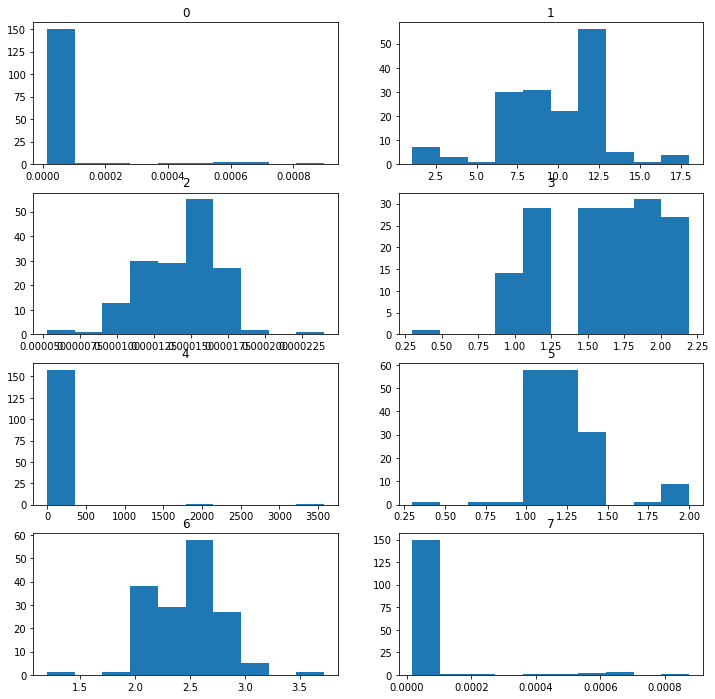

In [18]:
plt.figure(figsize=(12, 12))
plt.title("X values")
for i in range(8):
    plt.subplot(421 + i)
    plt.title(i)
    plt.hist(X[:, i])

In [41]:
corr = np.corrcoef(X.T)
pd.DataFrame(corr, columns=x_names)

,Параметр размера распределения Росина- Раммлера. м,Параметр ширины распределения Росина - Раммлера,Диаметр представительных частиц. м,Скорость ввода завесного охлаждения. м/с,Осевая компонента скорости,Радиальная компонента скорости,Тангенциальная компонента скорости,Средний диаметр Заутера. м
0,1.000000,0.440364,-0.319290,-0.353097,-0.023375,0.729284,-0.228066,0.999617
1,0.440364,1.000000,-0.061615,-0.133494,0.007440,0.414268,-0.215025,0.426595
2,-0.319290,-0.061615,1.000000,0.190086,0.018992,-0.187200,0.027077,-0.321959
3,-0.353097,-0.133494,0.190086,1.000000,0.019908,-0.247876,0.022559,-0.356801
4,-0.023375,0.007440,0.018992,0.019908,1.000000,-0.018252,0.002319,-0.024160
5,0.729284,0.414268,-0.187200,-0.247876,-0.018252,1.000000,-0.234307,0.727807
6,-0.228066,-0.215025,0.027077,0.022559,0.002319,-0.234307,1.000000,-0.224350
7,0.999617,0.426595,-0.321959,-0.356801,-0.024160,0.727807,-0.224350,1.000000


In [53]:
corrs = []
for i in range(1, 8):
    for j in range(i):
        corrs.append(((i, j), corr[i][j]))
        
corrs.sort(cmp=lambda x, y: cmp(y[1], x[1]))
for i in corrs:
    if i[1] < 0.5:
        break
    print x_names[i[0][0]], x_names[i[0][1]], i[1]
    print

Средний диаметр Заутера. м Параметр
размера
распределения 
Росина- Раммлера. м
0.9996169548310969

Радиальная компонента скорости Параметр
размера
распределения 
Росина- Раммлера. м
0.7292838051485814

Средний диаметр Заутера. м Радиальная компонента скорости 0.7278065581813309



Y values


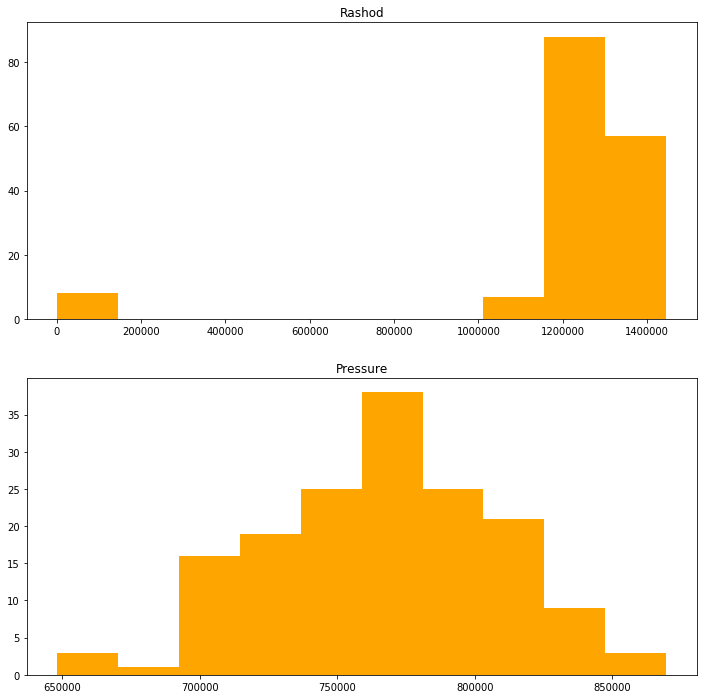

In [29]:
plt.figure(figsize=(12, 12))
print "Y values"
Y_names = ["Rashod", "Pressure"]
for i in range(2):
    plt.subplot(211 + i)
    plt.title(Y_names[i])
    plt.hist(Y[:, i], color="orange")

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train.shape, y_train.shape

((107, 8), (107, 2))

In [6]:
#model = LR()

model = KNR(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print r2_score(y_test[:, 0], y_pred[:, 0])
y_pred.shape
print y_names[0]

-0.5579332964895611
Расходный комплекс. 
м/с


In [25]:
model = LR()
model = KNR()
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
model = svr_rbf
model.fit(x_train, y_train[:, 0])
y_p = model.predict(x_test)
print r2_score(y_test[:, 0], y_p)

-0.013198128715933066


## WITHOUT COOLING

In [26]:
#TODO